In [110]:
import matplotlib.pyplot as plt
import numpy as np 
import scipy
import random

In [111]:
# generate 5x5 grid of spin either with -1 or 1 for ising model 
def generate_grid(N):
    return np.random.choice([-1,1],(N,N))

count = 0

# calculate energy of the grid
def Hamiltonian_Monte_carlo(grid,temperature):
    global count 
    length = len(grid[0]) # assuming quadratic grid
    rand_point_i = np.random.randint(1,length-1)
    rand_point_j = np.random.randint(1,length-1)
    random_point = grid[rand_point_i,rand_point_j]

    # calculate energy of the grid
    energy = -random_point*(grid[rand_point_i-1,rand_point_j] + grid[rand_point_i+1,rand_point_j] + grid[rand_point_i,rand_point_j-1] + grid[rand_point_i,rand_point_j+1])

    # flip spin according to Energy 
     
    if energy > 0:
        grid[rand_point_i,rand_point_j] = - random_point
        count += 1
    elif energy < 0:
        radius = np.random.uniform(0,1) #random num between [0,1)
        if radius < np.exp(2*energy/temperature):
            grid[rand_point_i,rand_point_j] = - random_point
            count += 1

    #print(grid)
    return grid

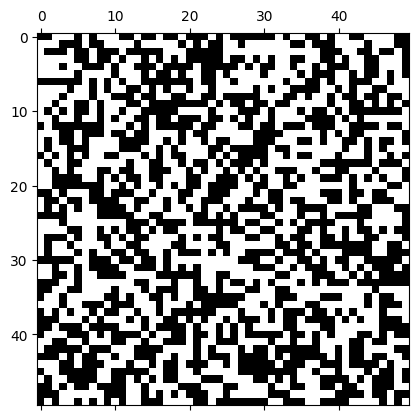

In [112]:
length_test = 50
fbf = generate_grid(length_test)

#plot the grid, where 1 is white and -1 is black    
plt.matshow(fbf,cmap='gray')

1510
2724
3883
4955
5969
7024
8222
9271
10267
11267
12211
13149
14138
15094
16046
16947
17925
18854
19808
20688


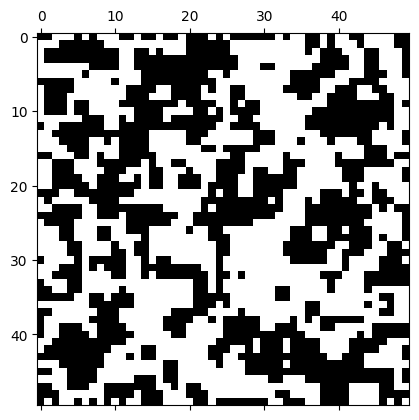

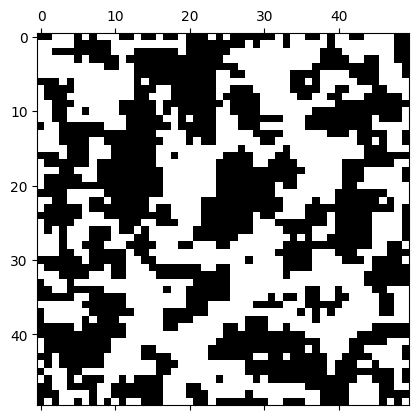

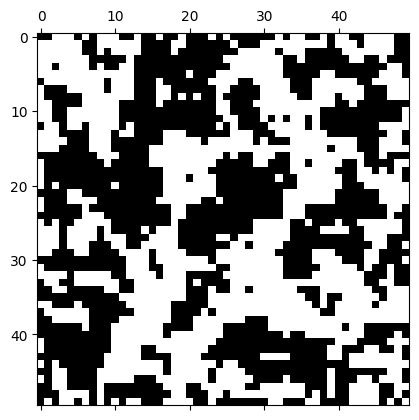

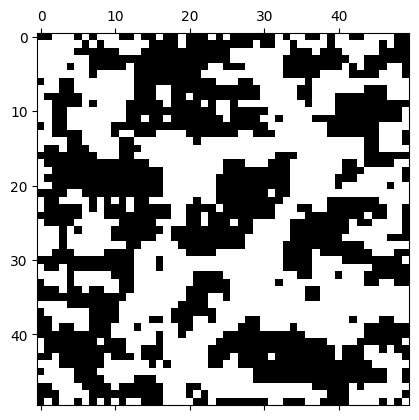

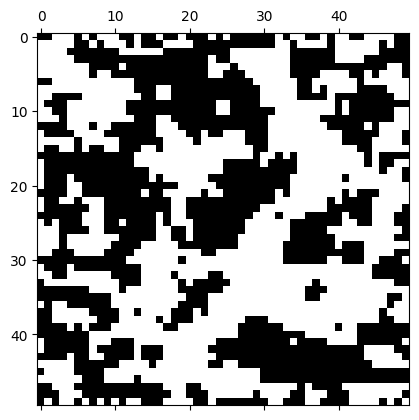

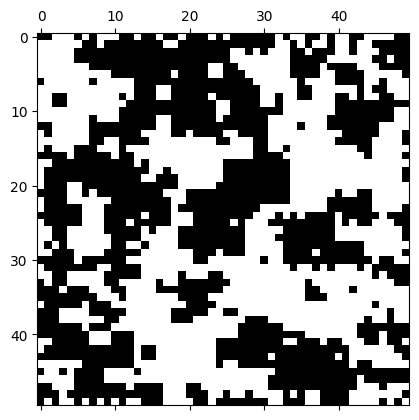

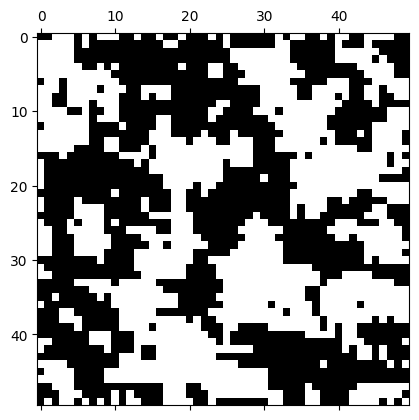

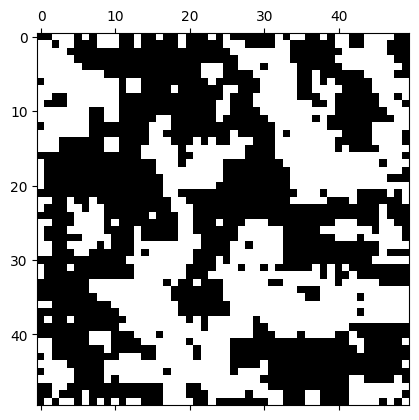

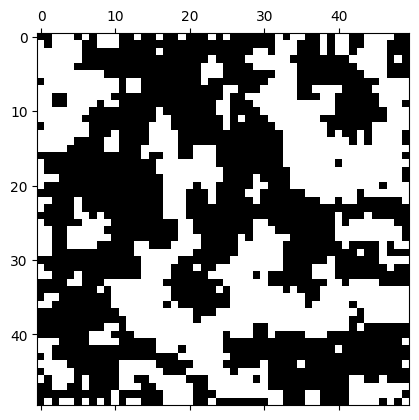

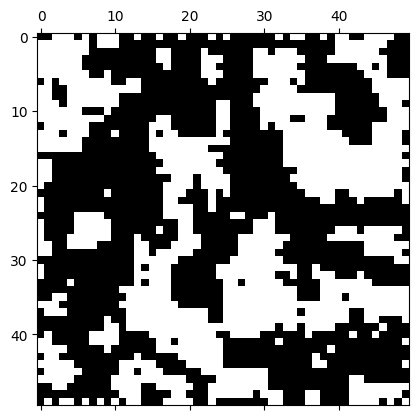

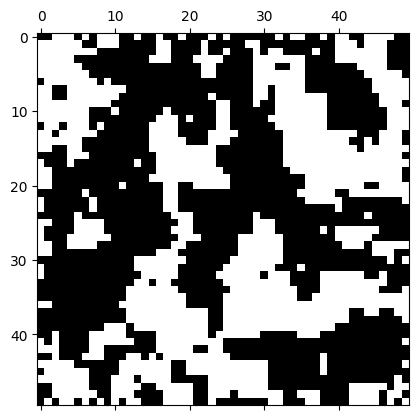

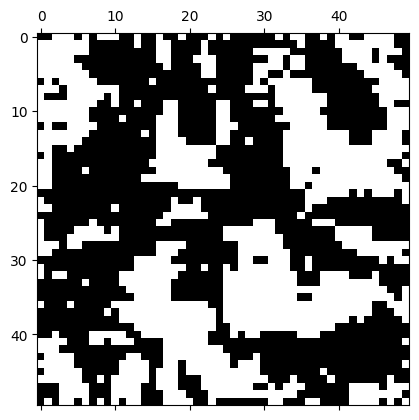

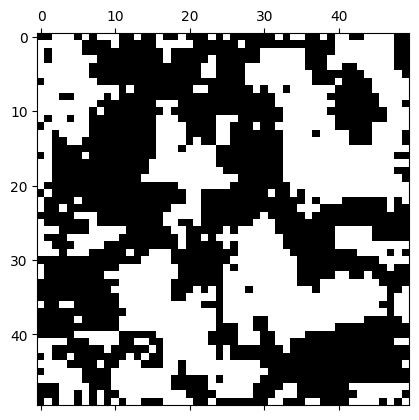

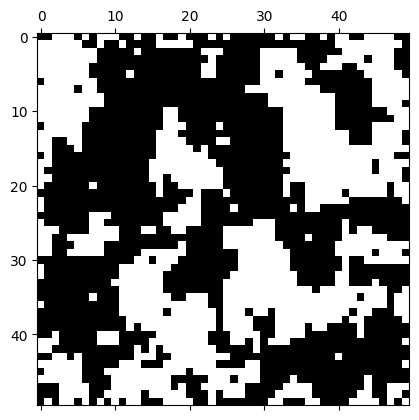

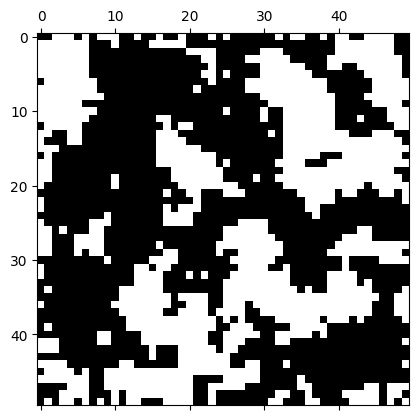

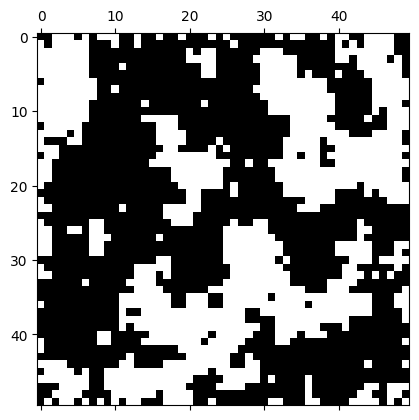

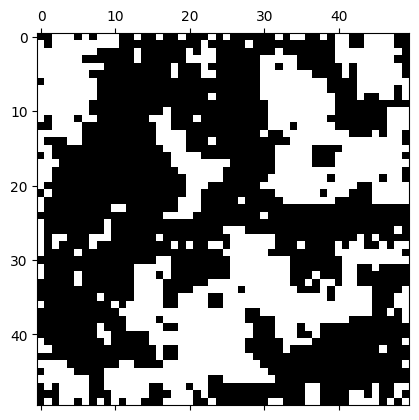

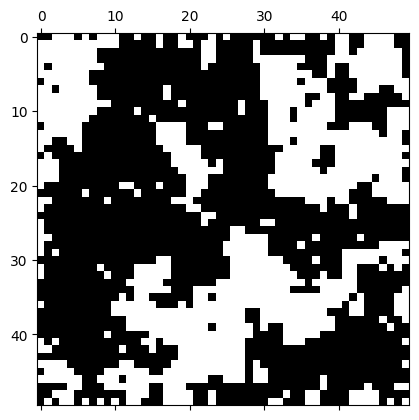

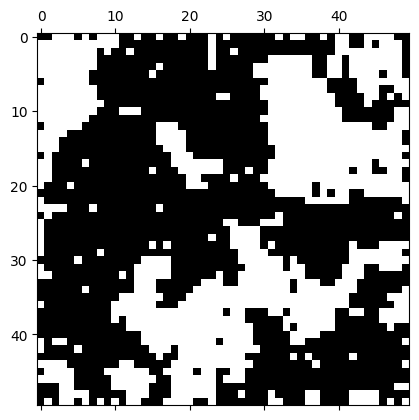

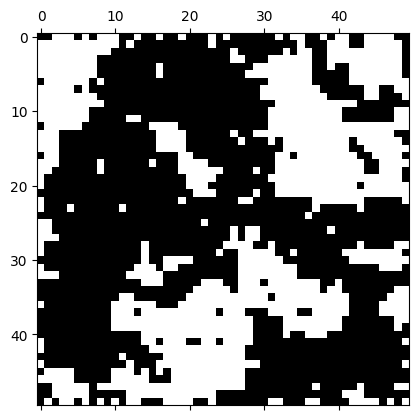

In [113]:
for i in range(20):
    # save the grid after 1000 iterations
    for j in range(10000):
        fbf = Hamiltonian_Monte_carlo(grid = fbf,temperature = 2)
    plt.matshow(fbf,cmap='gray')
    plt.savefig('ising_model_'+str(i+1)+'.png')
    print(count)